#**NATURAL LANGUAGE PROCESSING FOR ADVANCING CLIMATE CHANGEASSESSMENT AND POLICY DECISION MAKING**

###*DIBYA PANDEY*
###*NAVEEN DONTHULA*
###*SNIGDHA CHIGURUPATI*

##*DATA 690 - NLP FOR PRACTIONERS*
##*PROF. ANTONIO DIANA*


###*CLIMATE CHANGE : USA-Central*

#**Importing required libraries**

In [1]:
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
import string
from spacy.lang.en import English
from heapq import nlargest
punctuations = string.punctuation
from spacy.language import Language
nlp = English()
nlp.add_pipe('sentencizer')
parser = English()
!pip install -q vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
from nltk import sent_tokenize
from os import path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import plotly.express as px
from textblob import TextBlob
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import plotly.graph_objects as go
import numpy as np
import networkx as nx
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from nltk.tokenize import sent_tokenize
import spacy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
nltk.download('vader_lexicon')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

###**Reading the input text file**

In [2]:
with open('/content/sample_data/central_coast.txt', 'r') as file:
    text = file.read().replace('\n', '')

###**TEXT SUMMARIZATION**

In [3]:
 #definig sentence importances
def sentences_importance(text, normalised_dict):
    importance ={}
    for sentence in nlp(text).sents:
        for token in sentence:
            target_token = token.text.lower()
            if target_token in normalised_dict.keys():
                if sentence in importance.keys():
                    importance[sentence]+=normalised_dict[target_token]
                else:
                    importance[sentence]=normalised_dict[target_token]
    return importance

In [4]:
#Generating number vectors
def generate_numbers_vector(tokens):
    frequency = [tokens.count(token) for token in tokens]
    token_dict = dict(list(zip(tokens,frequency)))
    maximum_frequency=sorted(token_dict.values())[-1]
    normalised_dict = {token_key:token_dict[token_key]/maximum_frequency for token_key in token_dict.keys()}
    return normalised_dict

In [5]:
#Define the preprocess function
def pre_process(document):
    clean_tokens = [token.lemma_.lower().strip() for token in document]
    clean_tokens = [token for token in clean_tokens if token not in STOP_WORDS and token not in punctuations]
    tokens = [token.text for token in document]
    lower_case_tokens = list(map(str.lower, tokens))
    return " ".join(lower_case_tokens)

In [6]:
#defining to generate summary
def generate_summary(rank, text):
    target_document = parser(text)
    importance = sentences_importance(text, generate_numbers_vector(pre_process(target_document)))
    summary = nlargest(rank, importance, key=importance.get)
    return summary

In [7]:
# Save the summary
num_sentences_to_generate = 10
summary=(generate_summary(num_sentences_to_generate, text))

# Filename is complete path to file plus name and .txt extension
file = open('summary.txt', 'w')
file.write(str(summary))
file.close()

In [8]:
summary

[More specifically, a tropical cyclone with a sustained wind speed of 39–73 mph is classified as a “tropical storm” and a tropical cyclone with a sustained wind speed of 74 mph or greater is classified as a “hurricane.”,
 Yes, you have a gradual increase in temperatures, which is causing droughts and other temperature-related consequences, but the greatest dangers to our civilization come in super-charged waves, which caused, a couple of weeks back, a normal July rainstorm in South Arkansas to dump 13 inches of rain overnight, and in Vermont, four to six inches of rain fell in a couple of hours causing a flash flood, which caused billions of dollars in damages.,
 Yes, I know that's an everyday transaction, which occur multi-millions of times a day, and that thought really depresses me, because it seems as if we are like a bunch of lemmings heading for a cliff, and nothing we are doing is going to change our direction... except a disaster.,
 Vertis and I stopped at a restaurant for lunc

###**SENTIMENT ANALYSIS**

In [9]:
analyzer=SentimentIntensityAnalyzer()
summary_text = str(summary)
res=analyzer.polarity_scores(summary_text)
print(res)

{'neg': 0.095, 'neu': 0.832, 'pos': 0.072, 'compound': -0.9463}


In [10]:
# Finding the subjectivity

blob = TextBlob(summary_text)

# Calculate subjectivity
subjectivity = blob.sentiment.subjectivity

# Print the subjectivity score
print("Subjectivity:", subjectivity)

# Interpret the subjectivity score
if subjectivity < 0.5:
    print("The text is more objective.")
else:
    print("The text is more subjective.")

Subjectivity: 0.38706589706589706
The text is more objective.


In [11]:
pos = res["pos"]
neu = res["neu"]
neg = res["neg"]
print(f'The percentage of positive sentiment is {round(pos*100,2)}%')
print(f'The percentage of neutral sentiment is {round(neu*100,2)}%')
print(f'The percentage of negative sentiment is {round(neg*100,2)}%')


The percentage of positive sentiment is 7.2%
The percentage of neutral sentiment is 83.2%
The percentage of negative sentiment is 9.5%


In [12]:
# get polarity scores
neg, pos, neu = [],[],[]
for i, val in res.items():
    #ss = sia.polarity_scores(str(mylist))
    neg.append(res['neg'])
    pos.append(res['pos'])
    neu.append(res['neu'])
res['neg'] = neg
res['pos'] = pos
res['neu'] = neu

In [13]:
fig = px.scatter_ternary(res, a="neu", b="pos", c="neg")
fig.show()


###**NAMED ENTITY RECOGNITION**

In [14]:
# Load the spaCy model for NER
nlp_model = "en_core_web_sm"
nlp = spacy.load(nlp_model)

In [15]:
# Read the content from the summaryl file
with open("summary.txt", "r") as file:
    document_content = file.read()

In [16]:
# Function for Named Entity Recognition
def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
extracted_entities = perform_ner(document_content)

# Print the extracted named entities and their labels
print("Named Entities:")
for entity, label in extracted_entities:
    print(f"{entity} - {label}")

Named Entities:
39–73 mph - QUANTITY
74 mph - QUANTITY
a couple of weeks back - DATE
July - DATE
South Arkansas - GPE
13 inches - QUANTITY
overnight - TIME
Vermont - GPE
four to six inches - TIME
a couple of hours - TIME
billions of dollars - MONEY
multi-millions - CARDINAL
Vertis - GPE
a few days back - DATE
Styrofoam - PERSON
90 years - DATE
the United States - GPE
David Jones - PERSON
Harvard Medical School - ORG
the Harvard T.H. Chan School of Public Health - ORG
48 hours - TIME
Styrofoam - PERSON
multi-millions of pounds - MONEY
El Dorado High School - ORG
hundreds - CARDINAL
Montgomery’s - ORG
January - DATE
F - ORG
daily - DATE
July - DATE
112 - CARDINAL
Centreville - GPE
Bibb County - GPE
September 5, 1925 - DATE
-27° F - PRODUCT
Madison County - GPE
January 30 - DATE
1966.Temperatures - CARDINAL
half - CARDINAL
Mobile - GPE
Mobile County - GPE
Huntsville - PERSON
Madison County - GPE


###**TOPIC MODELING**

In [17]:
with open("summary.txt", "r") as file:
    data = file.read()
#tokenize the data into sentences
documents=sent_tokenize(str(data))
# convert the text to a tf-idf weighted term-document matrix
vectorizer = TfidfVectorizer(max_features=2000, min_df=1, stop_words='english')
X = vectorizer.fit_transform(documents)
idx_to_word = np.array(vectorizer.get_feature_names_out())

# apply NMF
nmf = NMF(n_components=5, solver="cd")
W = nmf.fit_transform(X)
H = nmf.components_
# print the topics
for i, topic in enumerate(H):
    print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-20:]]])))


Topic 1: 1966,cars,carbon,attitude,don,approximately,records,january,public,appears,half,average,madison,school,mobile,lot,state,temperature,daily,county
Topic 2: fall,change,rain,caused,couple,inches,classified,cliff,harvard,mph,sustained,related,speed,causing,wind,cyclone,civilization,probability,yes,tropical
Topic 3: reminded,cities,hundreds,packed,hot,1925,centreville,112,apartment,trash,northern,higher,27,southern,seen,sends,highest,market,approximately,high
Topic 4: 112,chan,reminded,county,trash,sidewalks,really,average,93,trees,tend,high,packed,dorado,school,bicycle,slightly,daily,local,maximum
Topic 5: arkansas,super,increase,stopped,dollars,flash,data,hurricane,like,heading,restaurant,couple,waitress,consequences,droughts,caused,overnight,rain,straw,days


In [18]:
def display_topics(model, features, no_top_words=20):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # Invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            word = features[largest[i]]
            weight = abs(words[largest[i]] * 100.0 / total)
            print("  %s (%2.2f)" % (word, weight))

In [19]:
# Call the display_topics function to show the topics
display_topics(nmf, idx_to_word)


Topic 00
  county (6.18)
  daily (4.71)
  temperature (4.32)
  state (3.03)
  lot (2.89)
  mobile (2.88)
  school (2.78)
  madison (2.72)
  average (2.69)
  half (2.51)
  appears (2.46)
  public (2.38)
  january (2.33)
  records (1.77)
  approximately (1.75)
  don (1.68)
  attitude (1.58)
  carbon (1.58)
  cars (1.49)
  1966 (1.44)

Topic 01
  tropical (2.34)
  yes (1.56)
  probability (1.56)
  civilization (1.56)
  cyclone (1.56)
  wind (1.56)
  causing (1.56)
  speed (1.56)
  related (1.56)
  sustained (1.56)
  mph (1.56)
  harvard (1.54)
  cliff (1.47)
  classified (1.47)
  inches (1.46)
  couple (1.32)
  caused (1.31)
  rain (1.25)
  change (0.96)
  fall (0.78)

Topic 02
  high (2.99)
  approximately (2.48)
  market (2.38)
  highest (2.36)
  sends (2.31)
  seen (2.30)
  southern (2.25)
  27 (2.24)
  higher (2.21)
  northern (2.19)
  trash (2.16)
  apartment (2.12)
  112 (2.10)
  centreville (1.91)
  1925 (1.88)
  hot (1.84)
  packed (1.77)
  hundreds (1.76)
  cities (1.75)
  remin

###**WORD FREQUENCY ANALYSIS**

Word Frequency: Counter({'temperature': 4, 'County': 4, 'tropical': 3, 'seems': 3, 'change': 3, 'School': 3, 'daily': 3, 'cyclone': 2, 'sustained': 2, 'wind': 2, 'speed': 2, 'mph': 2, 'classified': 2, 'Yes': 2, 'causing': 2, 'civilization': 2, 'caused': 2, 'couple': 2, 'back': 2, 'July': 2, 'inches': 2, 'rain': 2, 'hours': 2, 'multimillions': 2, 'cliff': 2, 'Styrofoam': 2, 'climate': 2, 'probability': 2, 'public': 2, 'Harvard': 2, 'lot': 2, 'average': 2, 'January': 2, 'approximately': 2, 'state': 2, 'appears': 2, 'Madison': 2, 'half': 2, 'Mobile': 2, 'More': 1, 'specifically': 1, '3973': 1, 'storm': 1, '74': 1, 'greater': 1, 'hurricane': 1, 'gradual': 1, 'increase': 1, 'temperatures': 1, 'droughts': 1, 'temperaturerelated': 1, 'consequences': 1, 'greatest': 1, 'dangers': 1, 'come': 1, 'supercharged': 1, 'waves': 1, 'weeks': 1, 'normal': 1, 'rainstorm': 1, 'South': 1, 'Arkansas': 1, 'dump': 1, '13': 1, 'overnight': 1, 'Vermont': 1, 'four': 1, 'six': 1, 'fell': 1, 'flash': 1, 'flood': 1,

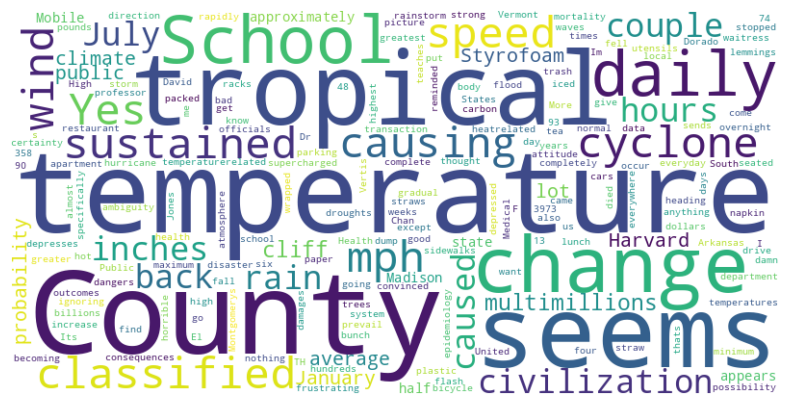

In [41]:
  # Get a list of stopwords
stop_words = set(stopwords.words("english"))
additional_stop_words = [ 'said','f','see','yes','Yes','like','really']
stop_words.update(additional_stop_words)



# Read the content from the "summary.txt" file
with open("summary.txt", "r") as file:
    summary = file.read()

# Tokenize the summary
word_tokens = summary.split()

# Remove non-alphanumeric characters and filter out stopwords
filtered_words = [re.sub(r'\W+', '', word) for word in word_tokens if word.lower() not in stop_words and re.sub(r'\W+', '', word) != '']
# Calculate word frequencies
word_freq = Counter(filtered_words)

# Print word frequencies
print("Word Frequency:", word_freq)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


###**WORD EMBEDDINGS**

In [21]:
stop_words = set(stopwords.words("english"))
# Define your list of additional stop words
additional_stop_words = ['team','single','via','miss','']
stop_words.update(additional_stop_words)
# Read the content from the original file (e.g., "summary.txt")
with open("summary.txt", "r") as file:
    summary = file.read()

#Preprocess the summary and tokenize it
tokenized_summary = simple_preprocess(summary)
processed_summary = [word for word in tokenized_summary if word not in stop_words]
# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[processed_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in tokenized_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create a DataFrame to hold the 2D coordinates and word labels
df = pd.DataFrame(word_vectors_2d, columns=['Dimension 1', 'Dimension 2'])
df['Word'] = list(word_embeddings.keys())

# Create the scatter plot using Plotly
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', text='Word', title='Word Embeddings Scatter Plot')

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(showlegend=False)

# Show the plot
fig.show()

In [22]:
# Create an empty figure
fig = go.Figure()

# Define colors
colors = px.colors.qualitative.Plotly

# Loop through each word embedding and add a scatter trace for it
for i, word in enumerate(df['Word']):
    fig.add_trace(go.Scatter(x=[df['Dimension 1'][i]], y=[df['Dimension 2'][i]],
                             mode='markers',
                             name=word,  # Legend label
                             marker_color=colors[i % len(colors)])) # Use different colors

# Customize the layout
fig.update_layout(title='Word Embeddings Scatter Plot',
                  xaxis_title='Dimension 1',
                  yaxis_title='Dimension 2',
                  legend_title='Words',
                  legend=dict(orientation="v",  # Vertical orientation
                              yanchor="top",
                              y=1.02,
                              xanchor="left",
                              x=1)  # Position outside the plot
                  )

# Show the plot
fig.show()


<ipython-input-34-a97434031b90>:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



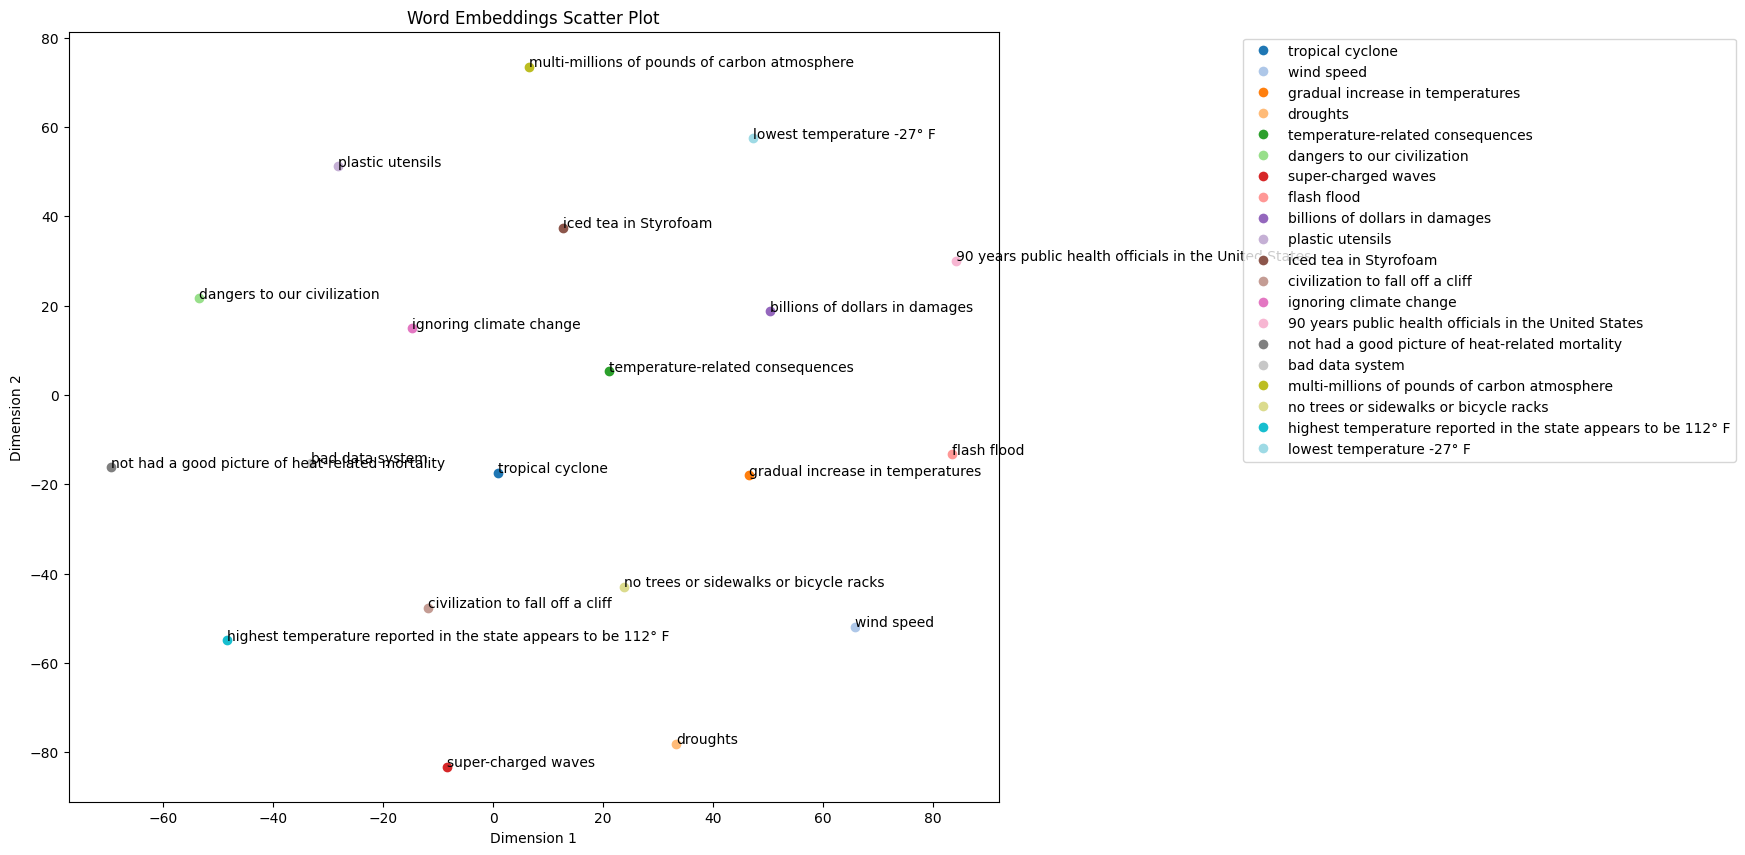

In [34]:

keywords_summary = [
    "tropical cyclone","wind speed","gradual increase in temperatures","droughts","temperature-related consequences","dangers to our civilization","super-charged waves","flash flood","billions of dollars in damages",
    "plastic utensils", "iced tea in Styrofoam","civilization to fall off a cliff","ignoring climate change","90 years public health officials in the United States",
    "not had a good picture of heat-related mortality","bad data system","multi-millions of pounds of carbon atmosphere","no trees or sidewalks or bicycle racks", "highest temperature reported in the state appears to be 112° F",
    "lowest temperature -27° F"
]
# Train the Word2Vec model with tokenized sentences
model = Word2Vec(sentences=[keywords_summary], vector_size=100, window=5, min_count=1, workers=4)

# Get the word embeddings for specific words
word_embeddings = {word: model.wv[word] for word in keywords_summary if word in model.wv}

# Convert word embeddings to a 2D array
word_vectors_2d = np.array([model.wv[word] for word in word_embeddings])

# Reduce the dimensionality using t-SNE with reduced perplexity
perplexity_value = min(30, len(word_embeddings) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
word_vectors_2d = tsne.fit_transform(word_vectors_2d)

# Create the scatter plot
plt.figure(figsize=(12, 10))

# Loop through each unique word and plot it with a different color
colors = plt.cm.get_cmap('tab20', len(word_embeddings.keys()))
for i, (word, color) in enumerate(zip(word_embeddings.keys(), colors.colors)):
  plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], color=color)
  plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=10)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Scatter Plot')

# Create a legend with labels and corresponding colors
labels = word_embeddings.keys()
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=8) for label, color in zip(labels, colors.colors)]
plt.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.8, 1))

plt.show()

###**KNOWLEDGE GRAPH**

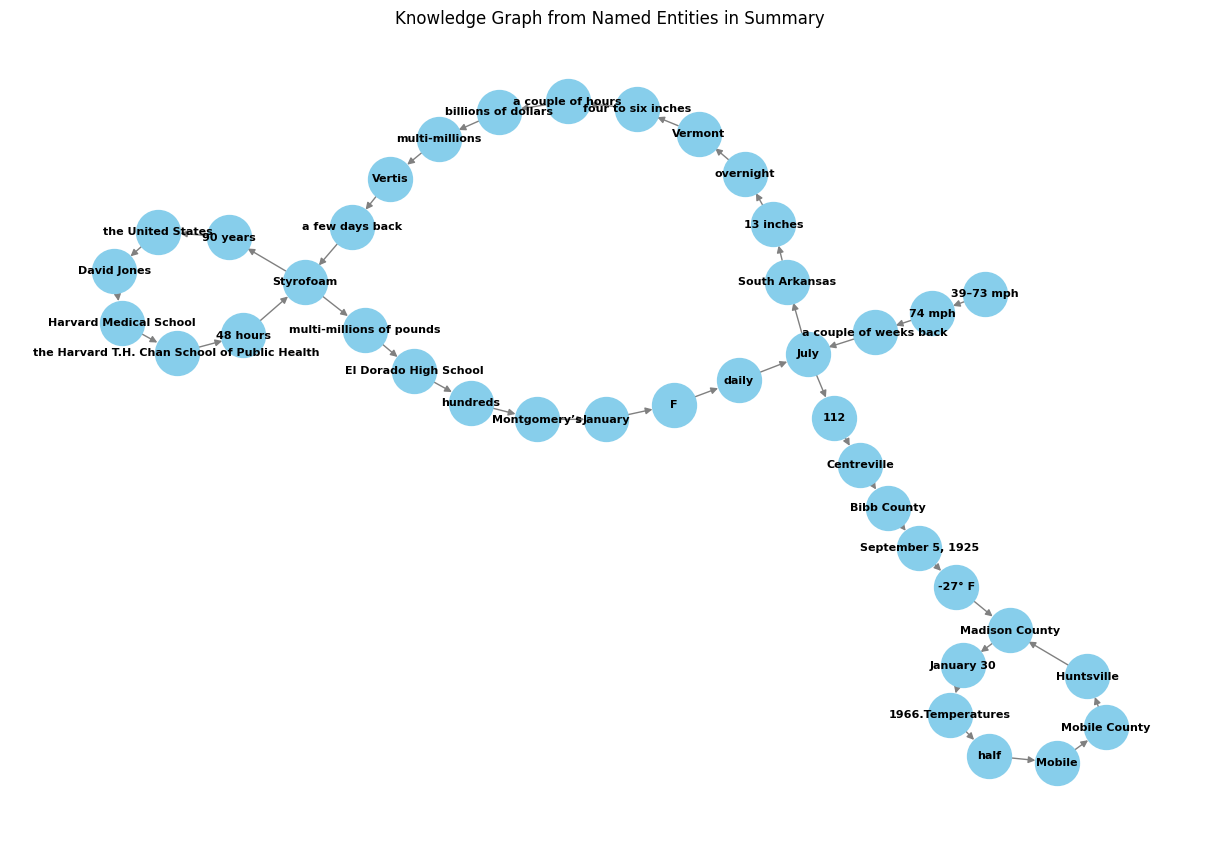

In [24]:
# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Process the summary with spaCy
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities
for ent in entities:
    G.add_node(ent.text, type=ent.label_)

# Connect named entities in the order they appear
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    G.add_edge(prev_ent.text, next_ent.text)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


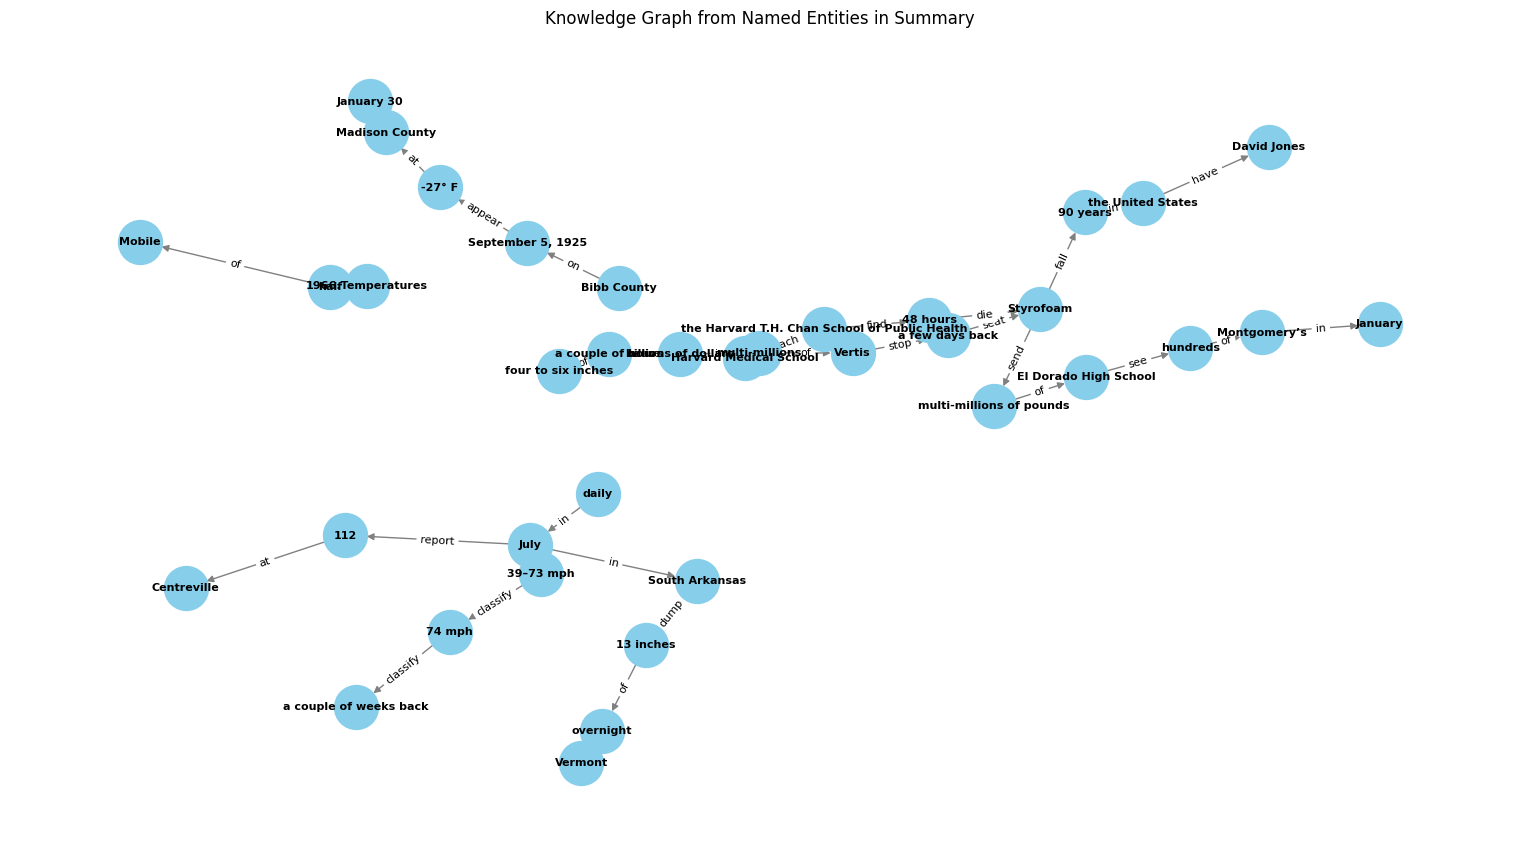

In [25]:
def find_relationship(start_ent, end_ent):
    # Check if start_ent comes before end_ent
    if start_ent.start < end_ent.start:
        tokens_between = [t for t in doc[start_ent.end:end_ent.start]]
    else:
        tokens_between = [t for t in doc[end_ent.end:start_ent.start]]

    # Find the first verb or preposition token between the entities
    for token in tokens_between:
        if token.pos_ in ('VERB', 'ADP'):
            return token.lemma_
    return None

# Load the spaCy NLP model
nlp = spacy.load("en_core_web_sm")
# Assuming `summary` contains the text of your summary
doc = nlp(summary)

# Create a directed graph
G = nx.DiGraph()

# Extract named entities
entities = list(doc.ents)

# Add nodes for named entities and edges with labels
for i in range(len(entities) - 1):
    prev_ent = entities[i]
    next_ent = entities[i + 1]
    relationship = find_relationship(prev_ent, next_ent)
    if relationship:
        G.add_edge(prev_ent.text, next_ent.text, label=relationship)

# Draw the graph with edge labels
plt.figure(figsize=(15, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_weight='bold', node_color='skyblue', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]['label'] for u, v in G.edges()}, font_size=8)
plt.title("Knowledge Graph from Named Entities in Summary")
plt.show()


###**DENDOGRAMS**

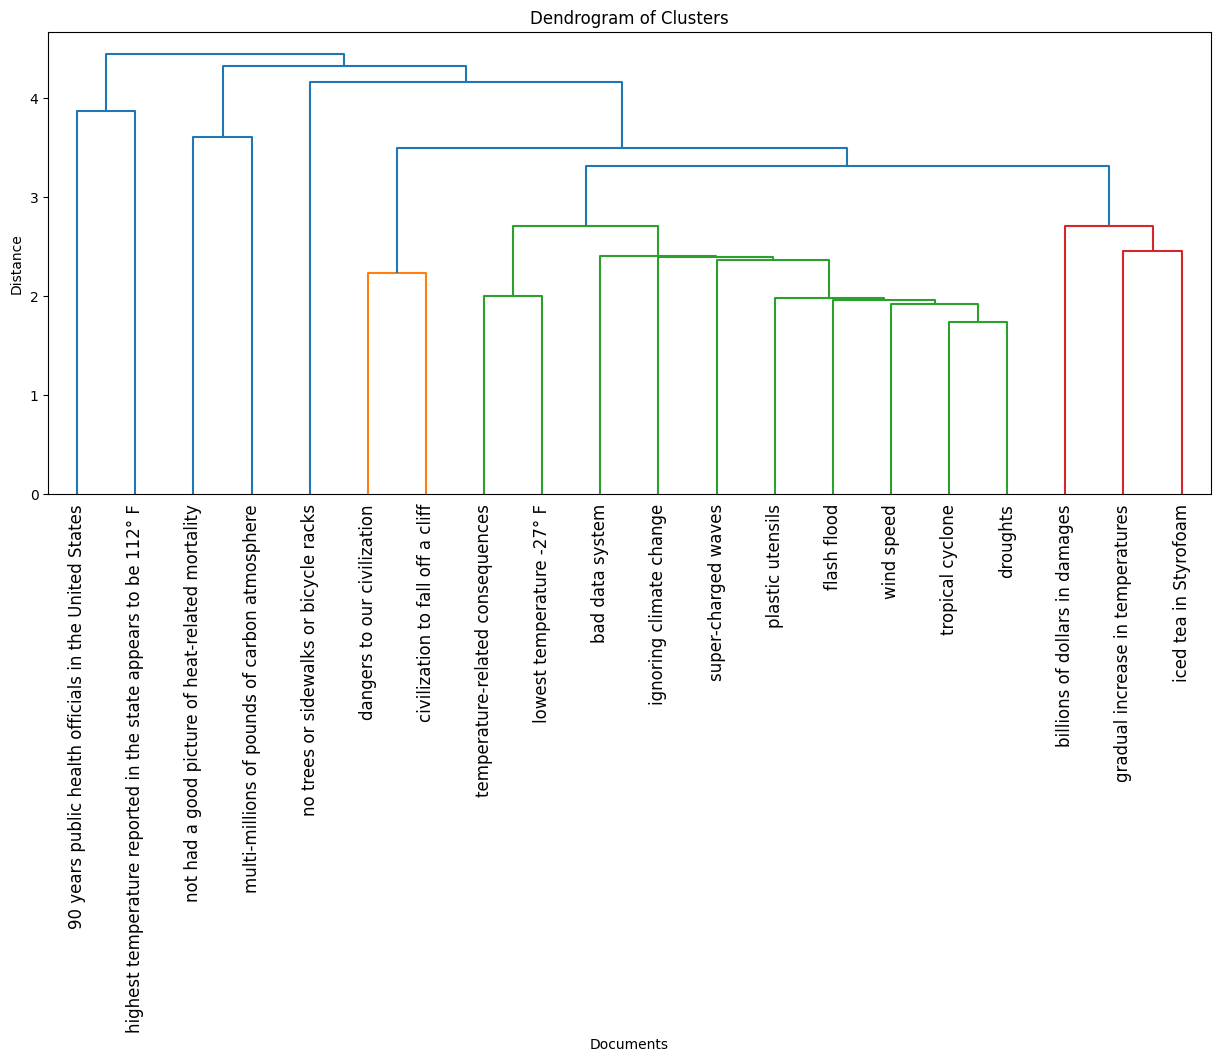

In [26]:
# Create a CountVectorizer to convert text data to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(keywords_summary)

# Perform Agglomerative Clustering
n_clusters = 3  # You can adjust the number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters = clustering.fit_predict(X.toarray())

# Create and plot the dendrogram
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(X.toarray(), method='ward')
dendrogram(linkage_matrix, labels=keywords_summary, orientation='top')
plt.title("Dendrogram of Clusters")
plt.ylabel("Distance")
plt.xlabel("Documents")
plt.xticks(rotation=90)
plt.show()


###**PREDICTIVE ANALYTICS**

In [27]:
num_sentences_to_generate = 50
summary_pa=(generate_summary(num_sentences_to_generate, text))
summary_pa

[More specifically, a tropical cyclone with a sustained wind speed of 39–73 mph is classified as a “tropical storm” and a tropical cyclone with a sustained wind speed of 74 mph or greater is classified as a “hurricane.”,
 Yes, you have a gradual increase in temperatures, which is causing droughts and other temperature-related consequences, but the greatest dangers to our civilization come in super-charged waves, which caused, a couple of weeks back, a normal July rainstorm in South Arkansas to dump 13 inches of rain overnight, and in Vermont, four to six inches of rain fell in a couple of hours causing a flash flood, which caused billions of dollars in damages.,
 Yes, I know that's an everyday transaction, which occur multi-millions of times a day, and that thought really depresses me, because it seems as if we are like a bunch of lemmings heading for a cliff, and nothing we are doing is going to change our direction... except a disaster.,
 Vertis and I stopped at a restaurant for lunc

In [28]:
# Saving the generated summary to a file
with open("predictive_analysis.txt", 'w') as file:
    file.write(str(summary_pa))

In [29]:
# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Read the summary from a file
with open("predictive_analysis.txt", 'r') as file:
    summary_pa = file.read()

# Remove brackets and extra commas
summary_pa = summary_pa.replace('[', '').replace(']', '')
summary_pa = re.sub(',\s*,', ',', summary_pa)

# Process the text with spaCy
doc = nlp(summary_pa)

sia = SentimentIntensityAnalyzer()

data = []
for sent in doc.sents:
    sentence = sent.text.strip()  # Remove leading and trailing whitespace
    if sentence.startswith(','):
        sentence = sentence[1:].strip()

    # Skip adding the row if the sentence is empty
    if sentence == '':
        continue

    sentiment_score = sia.polarity_scores(sentence)
    compound_score = sentiment_score['compound']

    # Classify sentiment as positive, neutral, or negative
    if compound_score >= 0.3:
        sentiment_label = "positive"
    elif compound_score <= -0.3:
        sentiment_label = "negative"
    else:
        sentiment_label = "neutral"

    data.append((sentence, compound_score, sentiment_label))

df = pd.DataFrame(data, columns=['sentence', 'compound_score', 'sentiment_label'])
df


,sentence,compound_score,sentiment_label
0,"More specifically, a tropical cyclone with a s...",0.3612,positive
1,"Yes, you have a gradual increase in temperatur...",-0.5023,negative
2,"Yes, I know that's an everyday transaction, wh...",0.1796,neutral
3,Vertis and I stopped at a restaurant for lunch...,-0.2263,neutral
4,I am completely convinced civilization is abou...,0.2716,neutral
5,“It’s frustrating that for 90 years public hea...,-0.8627,negative
6,"It seems I'm reminded daily of the ""I don't gi...",0.3089,positive
7,"When I see the Styrofoam, the straws and other...",-0.3415,negative
8,F. The highest temperature reported in the sta...,-0.3818,negative
9,"For example, day length for the city of Montgo...",0.0000,neutral


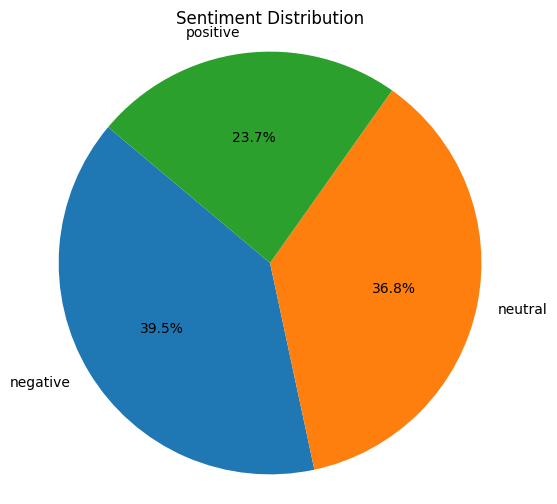

In [30]:
# Count the number of each sentiment label
sentiment_counts = df['sentiment_label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [31]:
X = df[['compound_score']]
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
clf1 = make_pipeline(StandardScaler(), LogisticRegression())
clf2 = RandomForestClassifier(random_state=42)
clf3 = make_pipeline(StandardScaler(), SVC(probability=True))  # Enable probability estimates

meta_clf = LogisticRegression()
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                                  meta_classifier=meta_clf,
                                  use_probas=True,
                                  average_probas=False)

stacking_clf.fit(X_train, y_train)

StackingClassifier(classifiers=[Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression())]),
                                RandomForestClassifier(random_state=42),
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(probability=True))])],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [33]:
# Make predictions on the test data
y_pred = stacking_clf.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.875
Precision: 0.9166666666666666
Recall: 0.875
F1 Score: 0.8785714285714286
